In [31]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.exposure import cumulative_distribution
import scipy as sc
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import scipy.signal as sig
import math
from skimage.morphology import binary_erosion, binary_dilation

In [16]:
a = imread('lab6_images/lincoln.png')

In [3]:
def binarize_this(image_file, thresh_val=127):
    image_src = image_file
    image_b = convert_binary(image_src=image_src, thresh_val=thresh_val)
    return image_b

def convert_binary(image_src, thresh_val):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

def erode_this(image_file, erosion_level=1, with_plot=False):
    erosion_level = 3 if erosion_level < 3 else erosion_level

    structuring_kernel = np.full(shape=(erosion_level, erosion_level), fill_value=255)
    image_src = binarize_this(image_file=image_file)

    orig_shape = image_src.shape
    pad_width = erosion_level - 2

    # pad the matrix with `pad_width`
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])

    # sub matrices of kernel size
    flat_submatrices = np.array([
        image_pad[i:(i + erosion_level), j:(j + erosion_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])

    # condition to replace the values - if the kernel equal to submatrix then 255 else 0
    image_erode = np.array([255 if (i == structuring_kernel).all() else 0 for i in flat_submatrices])
    image_erode = image_erode.reshape(orig_shape)

    if with_plot:
        cmap_val = 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

        ax1.axis("off")
        ax1.title.set_text('Original')

        ax2.axis("off")
        ax2.title.set_text("Eroded - {}".format(erosion_level))

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_erode, cmap=cmap_val)
        plt.show()
        return True
    return image_erode

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


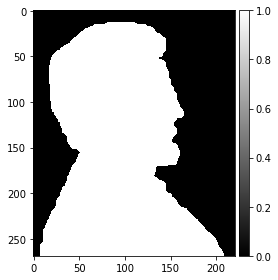

In [32]:
cross = np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]])
v = binary_dilation(a,cross).astype(np.uint8)
imshow(v,cmap='gray')
print(v)